# Waves of COVID-19 infections across the world
> People or land?

- toc: true
- badges: true
- comments: true
- categories: [Covid19, cartogram, geopandas, equalearth]
- image: images/europe.png

In [1]:
#hide
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/TrueCue/world_cartogram'

Mounted at /content/drive
/content/drive/My Drive/TrueCue/world_cartogram


## Waves of infection across the world over time

Throughout the COVID-19 pandemic the headlines have often focused on record daily figures for individual countries. We lose an overview of how various countries are doing over time.

As part of the [TrueCue Women in Data Hackathon](https://truecue.com/womenindata/hackathon/), team AMIA decided to explore the data by preparing an animated gif of the world with daily plots. Since the disease affects people not land, it made sense to use a cartogram where each cell represented a number of people. This style of graphic looks strange but makes a lot of sense for a pandemic, which affects people not land area. As a contrast, the same data is shown on a world map, using the Equal Earth projection, to see the different impression that is given.

The aim of this notebook is to show how to put together these .gifs using open source components, both data and software. The same basic structure can be used to show any data that you have at a country level.

The data shown are 14-day notification rates for COVID-19, a metric widely used to get an idea of how countries are managing. Although each country has its own criteria for testing for the disease and notifying cases this data gives an indication of how countries are coping.


Library imports to run the notebook on Google Colab:

In [18]:
#collapse-hide
!pip install geopandas
!apt install gifsicle
!pip install pygifsicle 

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

from PIL import Image
import requests
from io import BytesIO

from pathlib import *
from pygifsicle import optimize

path=Path()
for dir_out in ['pngs_world', 'pngs_world_map']:
        dest = (path/dir_out)
        dest.mkdir(exist_ok=True)

### World cartogram

> youtube: https://youtu.be/EIIxryarREA

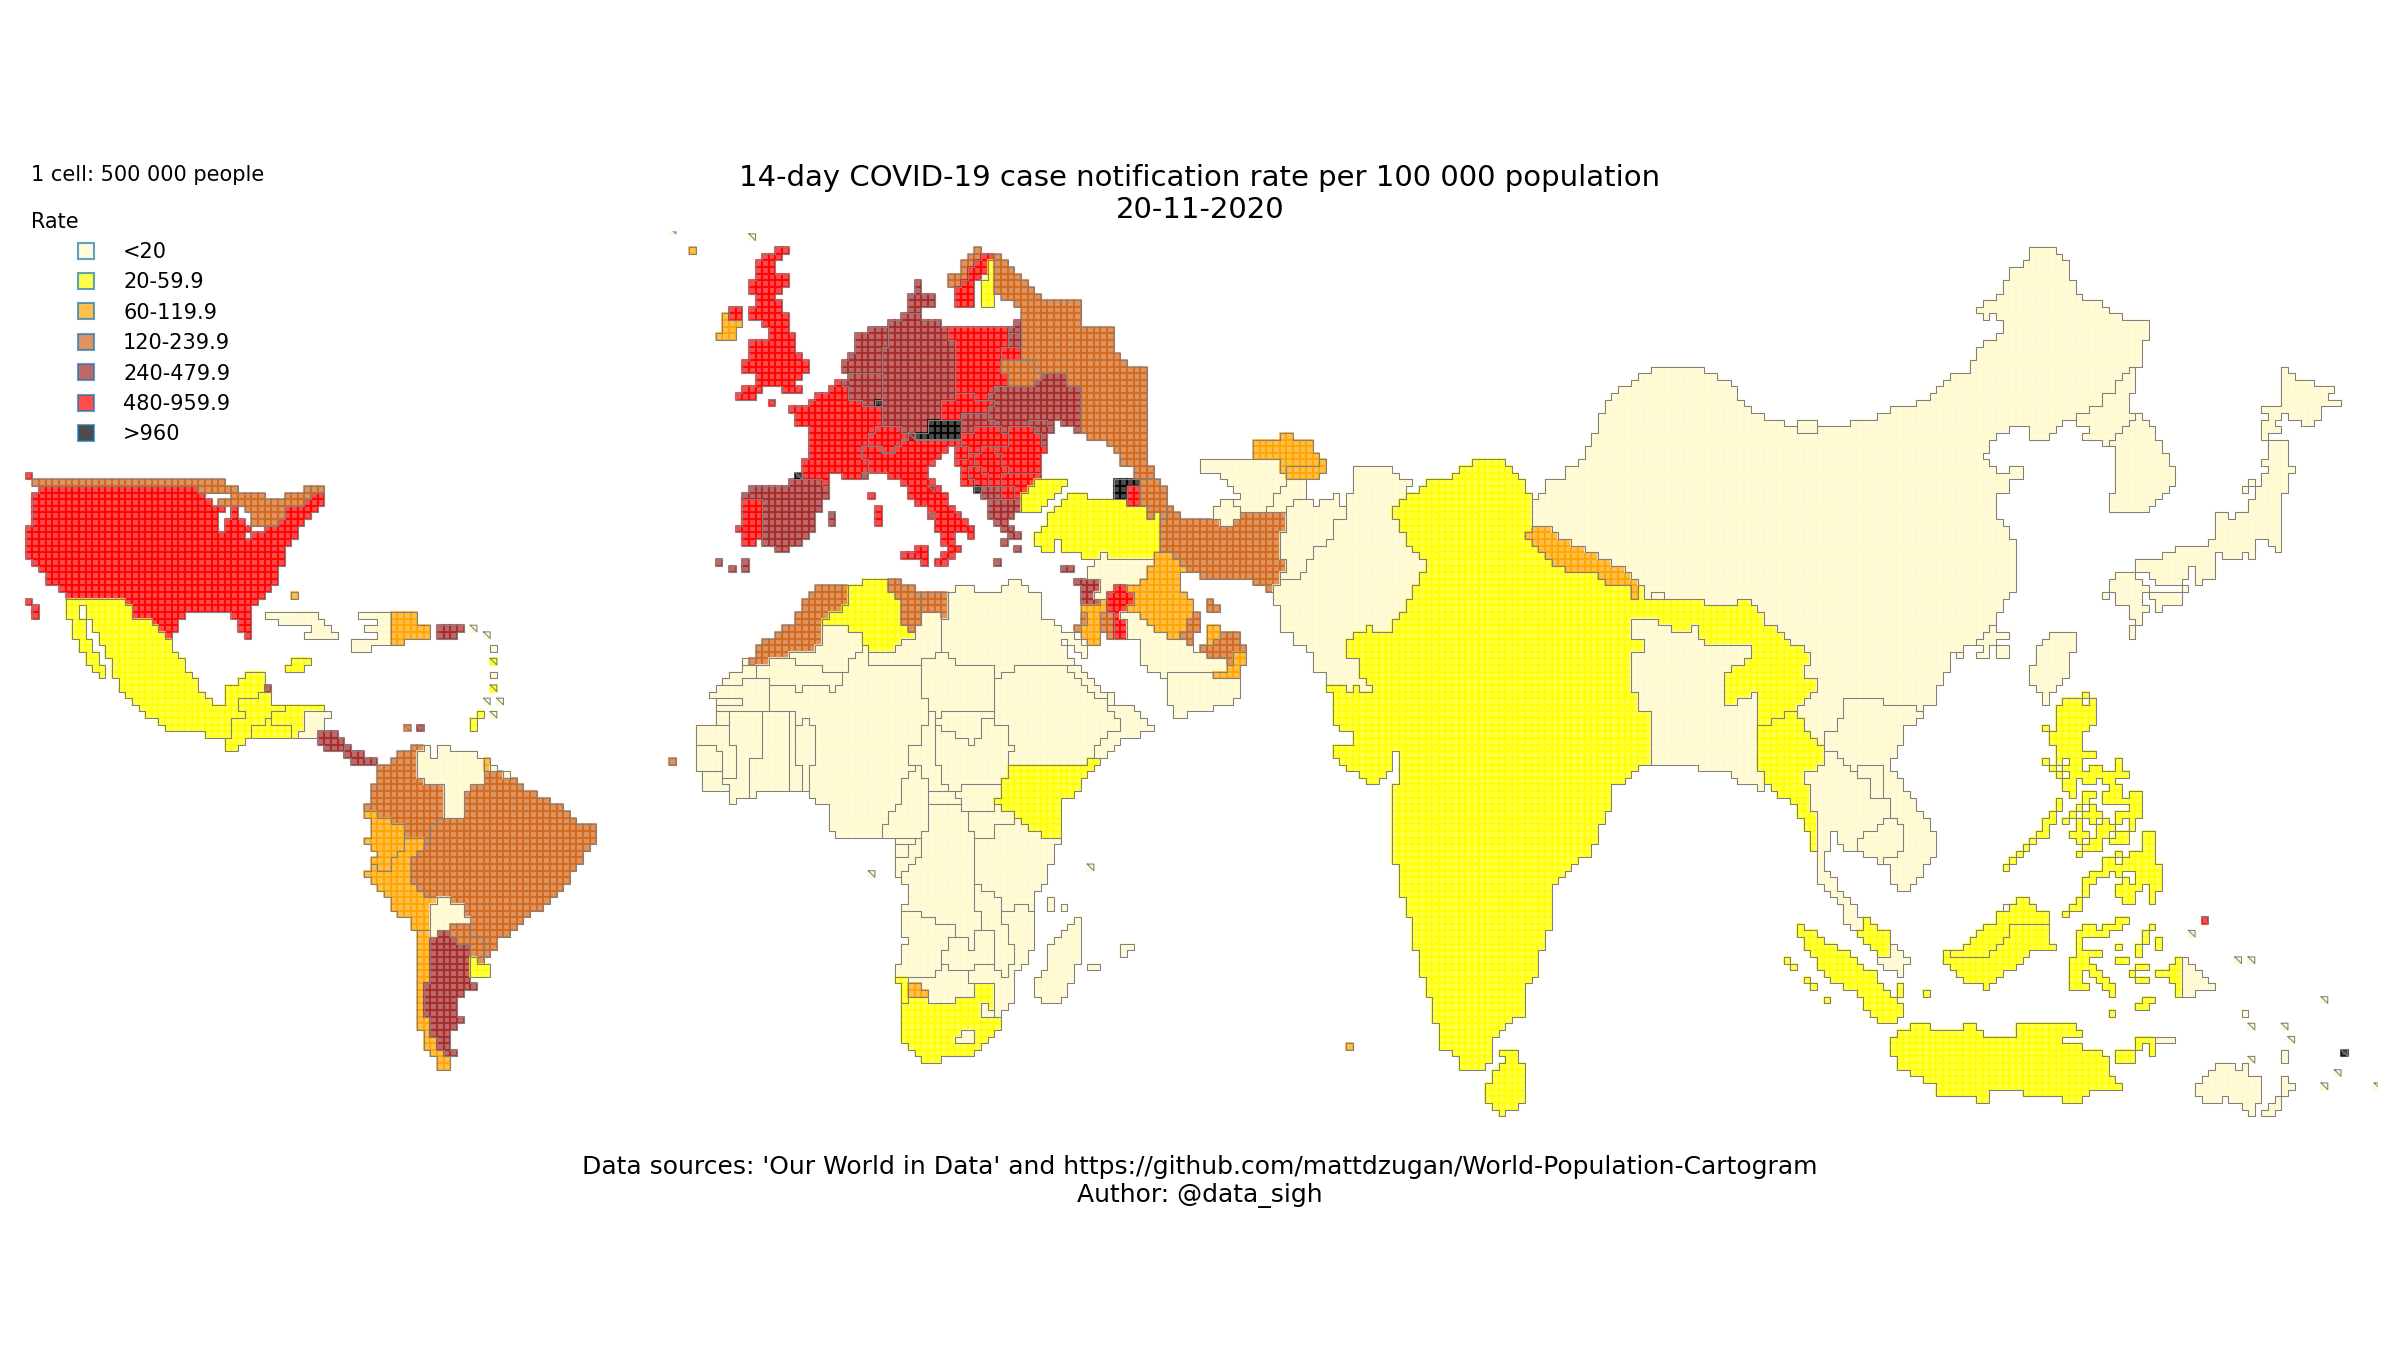

In [ ]:
Image.open('./pngs_world/2020-11-20.png')

### Original cartogram from Max Roser of 'Our World in Data'

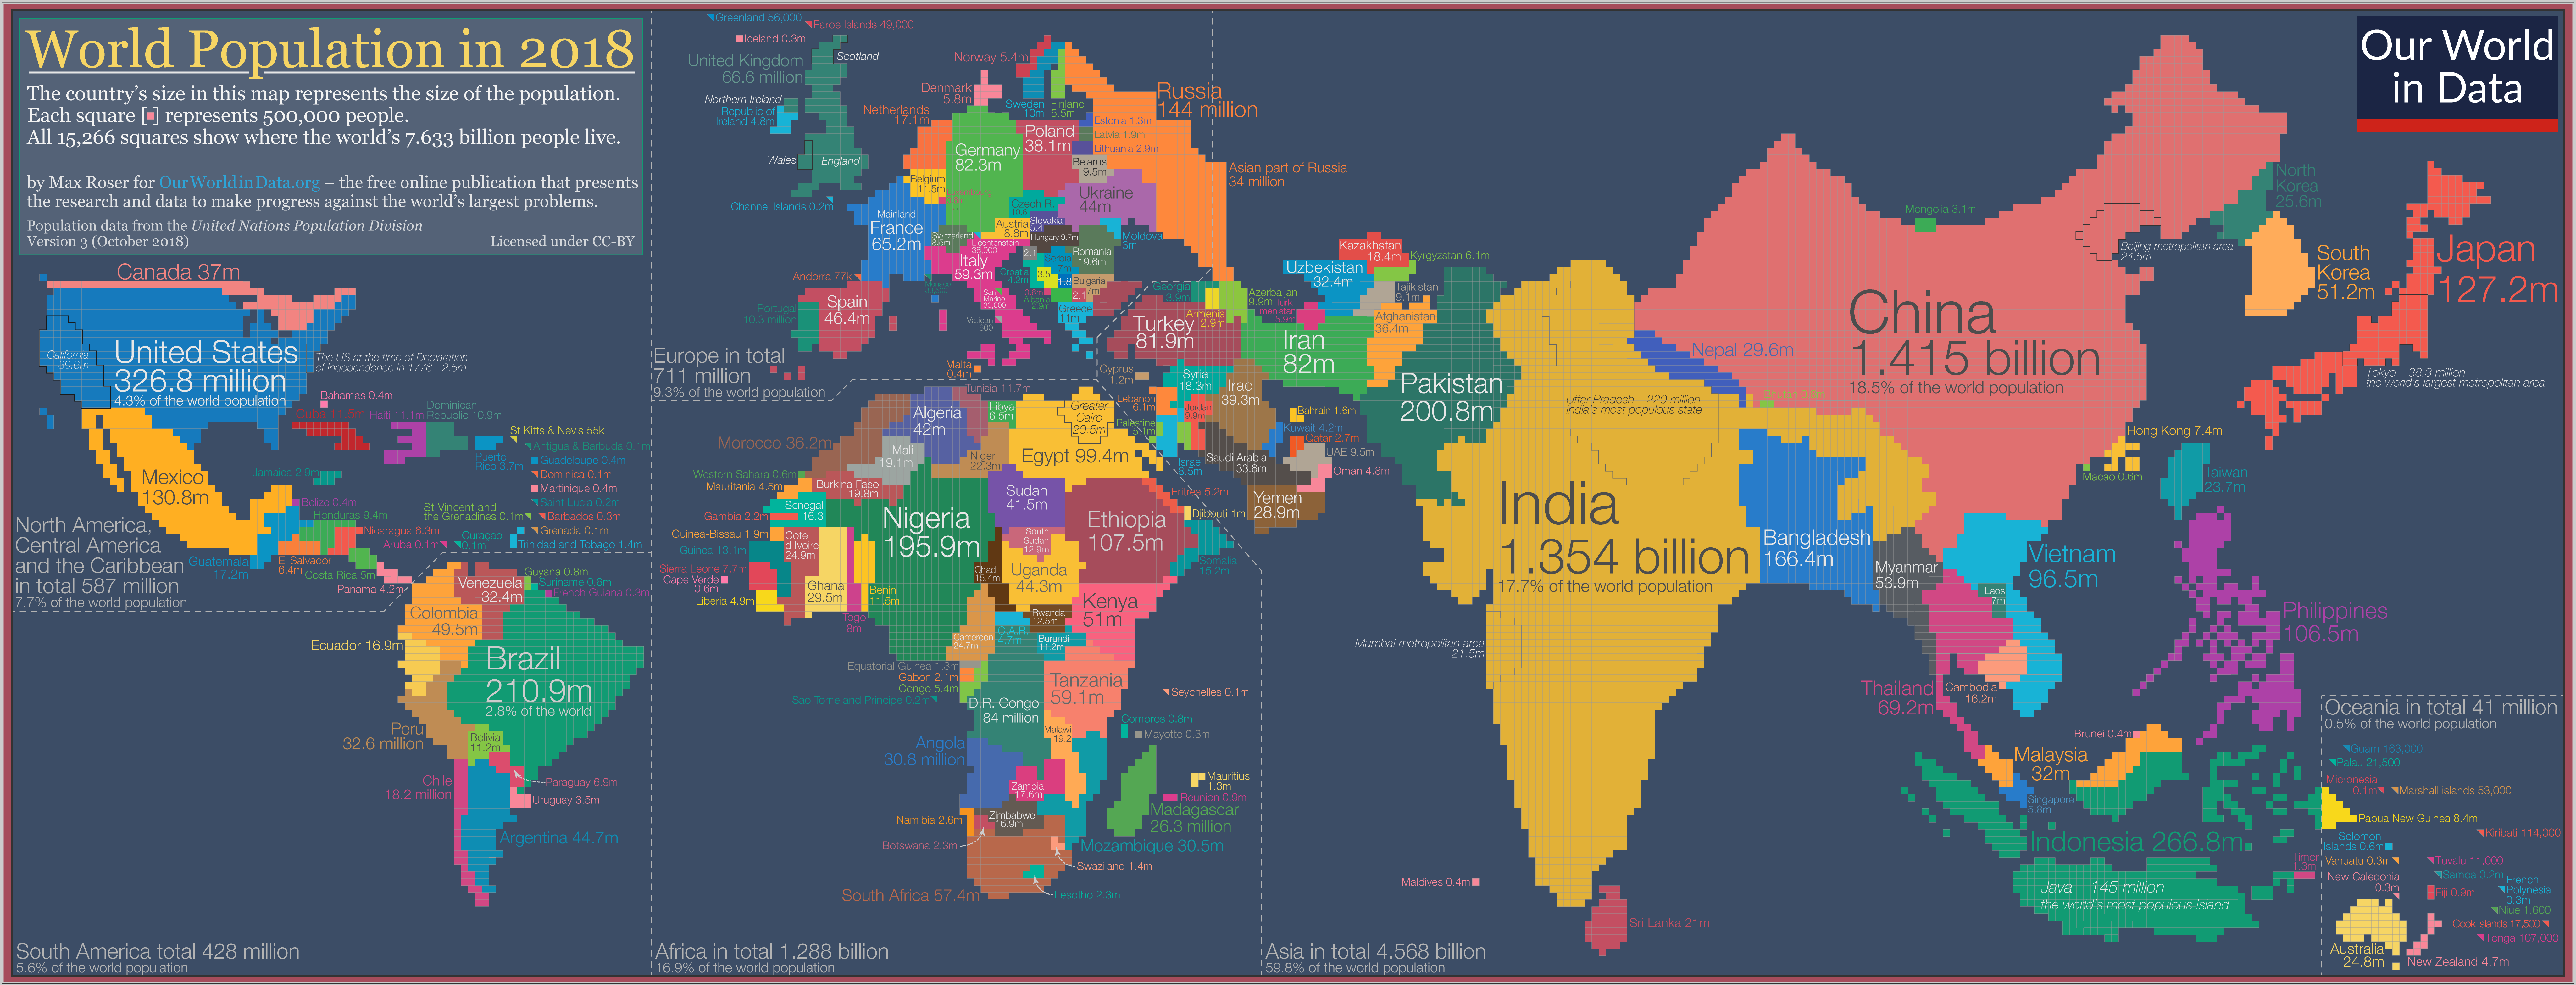

In [ ]:
#collapse-hide
Image.open(BytesIO(requests.get('https://upload.wikimedia.org/wikipedia/commons/9/90/Global_population_cartogram.png').content))

> twitter: https://twitter.com/MaxCRoser/status/1315729833545129984

### World map

> youtube: https://youtu.be/LWWGICbpXJ8

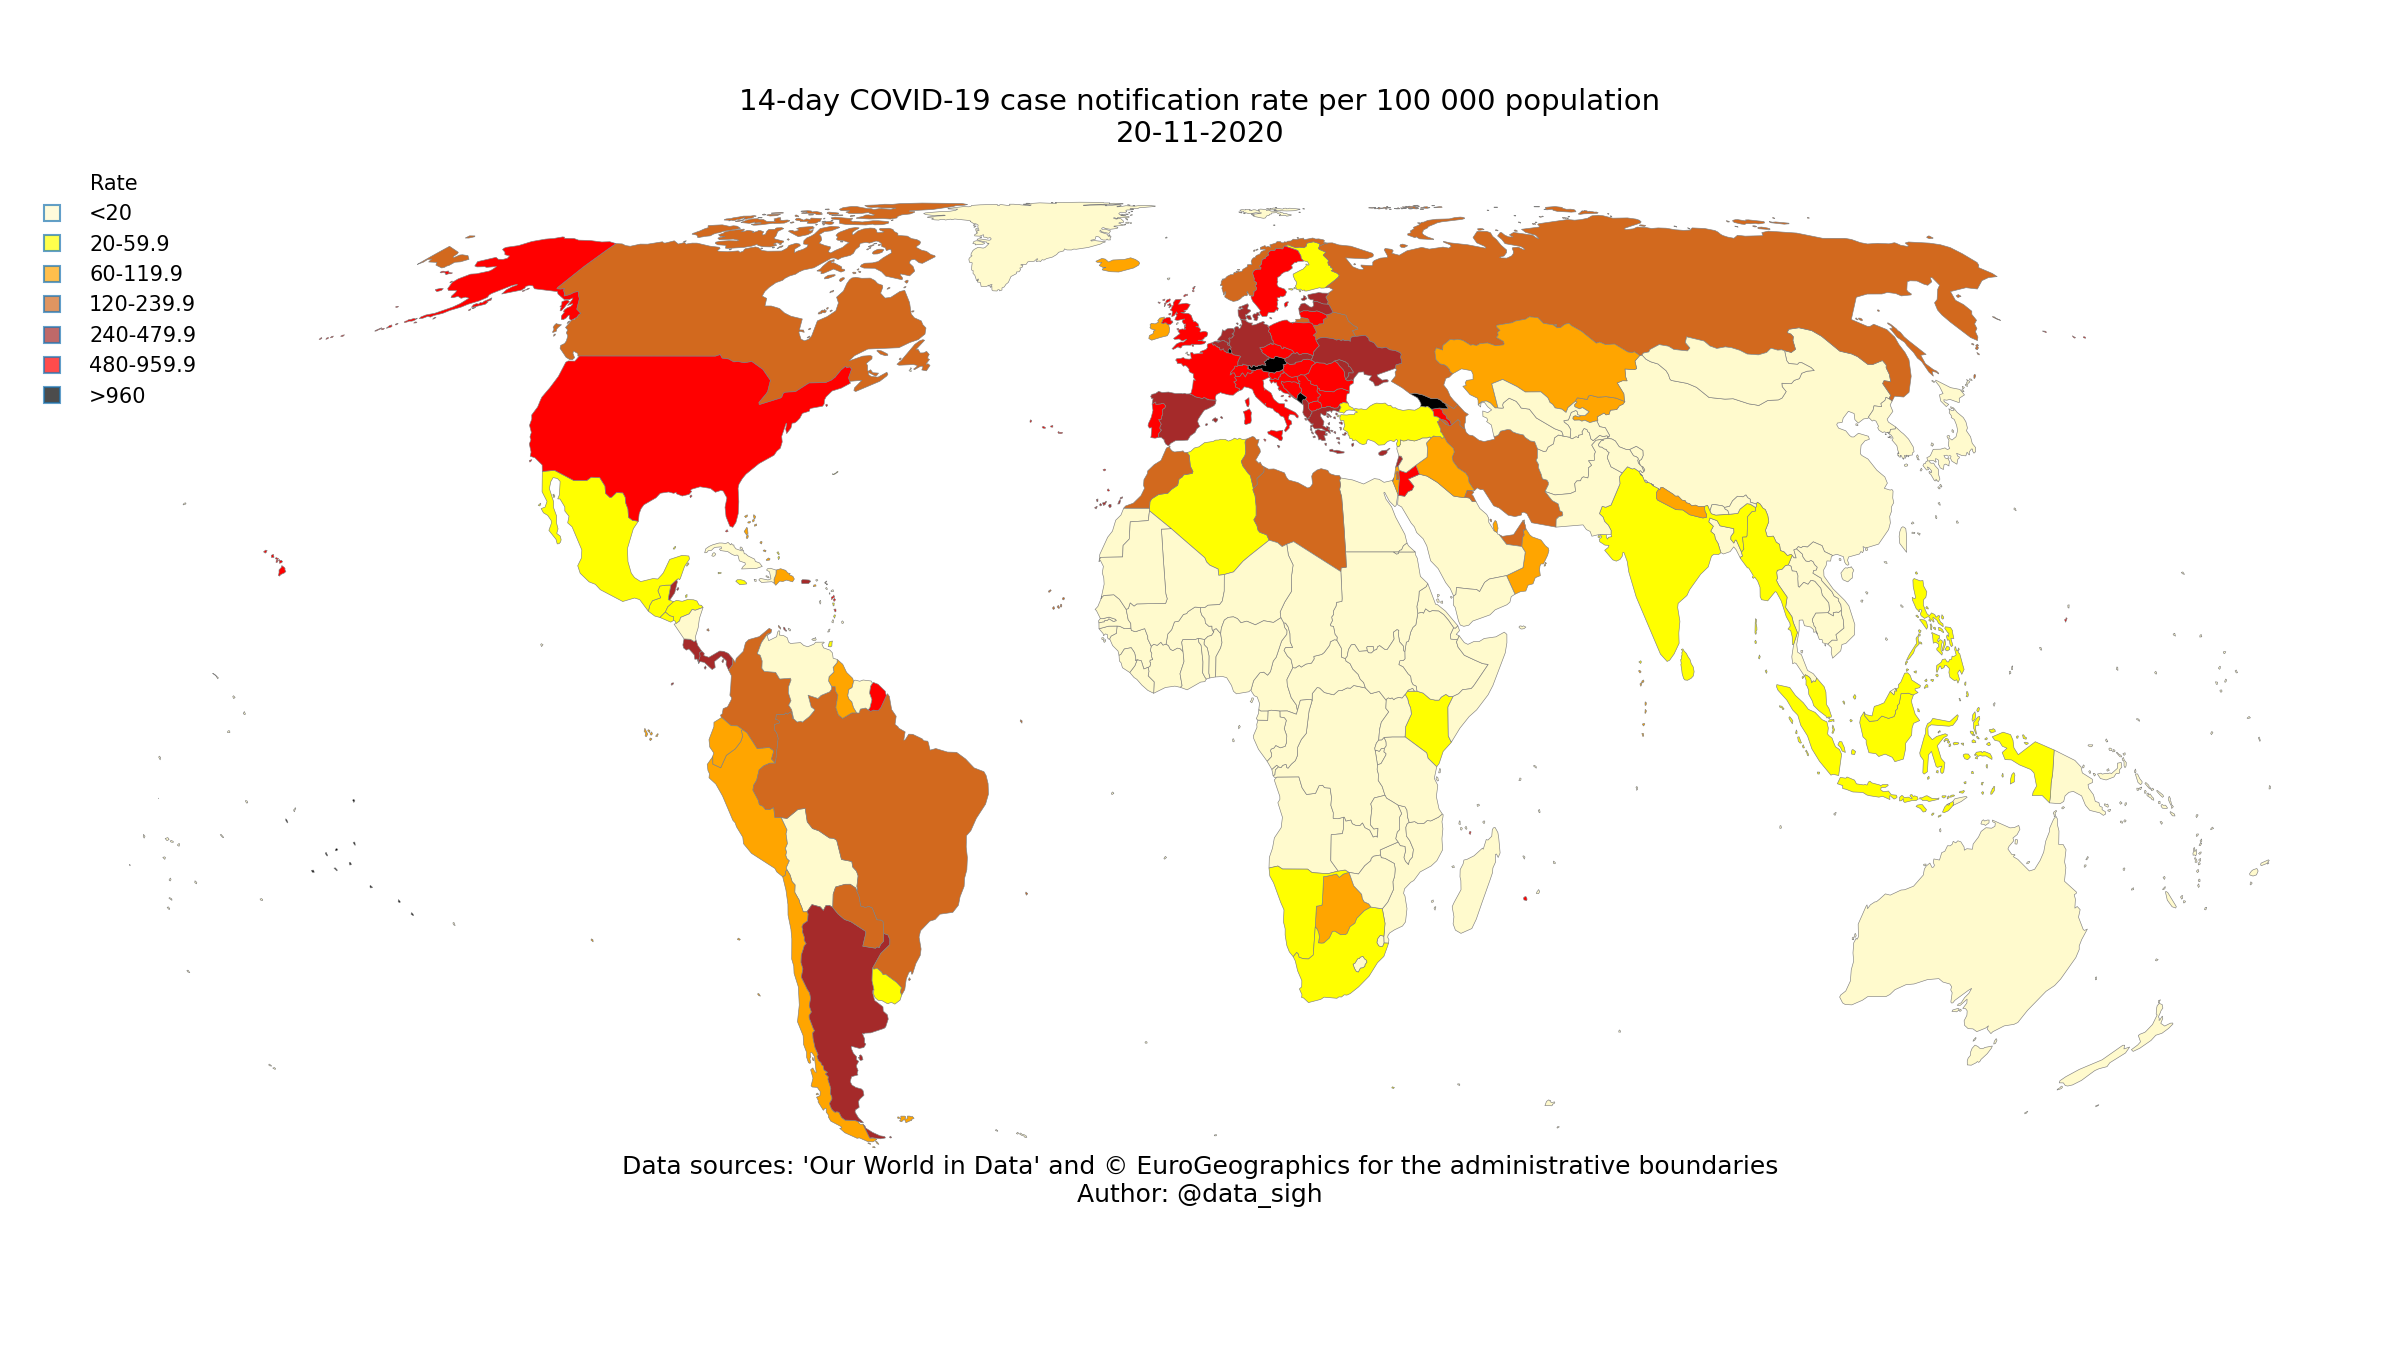

In [ ]:
Image.open('./pngs_world_map/2020-11-20.png')

The most striking differences between the cartogram and the map 
 - the map under represents the population of India
 - the map over represents the population of Canada and Russia.

The .gifs generated by this notebook have been converted to .mp4 video [online](https://ezgif.com/gif-to-mp4) and uploaded to [youtube](https://www.youtube.com/).

## Import the latest COVID-19 data from 'Our World in Data'

In [4]:
df=(pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv'))[['date','new_cases','iso_code','population']]
df.head().T

,0,1,2,3,4
date,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04
new_cases,0,0,0,0,0
iso_code,AFG,AFG,AFG,AFG,AFG
population,3.89283e+07,3.89283e+07,3.89283e+07,3.89283e+07,3.89283e+07


## Extract daily new_cases: new confirmed cases of COVID-19 for 215 countries

In [5]:
df_pvt=df.pivot(index='date', columns='iso_code', values='new_cases').fillna(0).astype('int')
df_pvt.drop(df_pvt.columns[0], axis=1, inplace=True)
df_pvt.head().T

date,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04
iso_code,,,,,
ABW,0,0,0,0,0
AFG,0,0,0,0,0
AGO,0,0,0,0,0
AIA,0,0,0,0,0
ALB,0,0,0,0,0
...,...,...,...,...,...
WLF,0,0,0,0,0
YEM,0,0,0,0,0
ZAF,0,0,0,0,0


## Calculate the 14-day notification rate per 100_000 population for each country

In [6]:
df_14_day=pd.DataFrame()
for col in df_pvt.columns:
  df_14_day[col]=df_pvt[col].rolling(window=14).sum()
df_14_day.fillna(0, inplace=True)

for col in df_14_day.columns[1:]:
  popn=(df.loc[(df.date=='2020-11-01') & (df.iso_code==col), 'population']/100000).values
  if len(popn) > 0: # avoid dividing by 0
    df_14_day[col]=df_14_day[col]/popn
  else: 
    print ('No population data for', col)

df_14_day = df_14_day.T
df_14_day.head().T

No population data for VUT


,ABW,AFG,AGO,AIA,ALB
date,,,,,
2019-12-31,0.0,0.000000,0.000000,0.0,0.000000
2020-01-01,0.0,0.000000,0.000000,0.0,0.000000
2020-01-02,0.0,0.000000,0.000000,0.0,0.000000
2020-01-03,0.0,0.000000,0.000000,0.0,0.000000
2020-01-04,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...
2020-11-16,143.0,4.546816,7.816525,0.0,230.314824
2020-11-17,144.0,4.469751,7.351002,0.0,240.079227
2020-11-18,138.0,5.232692,7.262766,0.0,250.955591


## Sanity check - look at rates for the last week for some example countries

In [7]:
df_14_day.loc[['ESP','GBR','USA','FRA','DEU']].T.tail(7)

,ESP,GBR,USA,FRA,DEU
date,,,,,
2020-11-14,583.711403,482.796130,511.230655,904.685502,304.119124
2020-11-15,583.711403,490.080400,537.315945,903.849022,307.425247
2020-11-16,547.894747,492.596383,552.774734,870.049707,305.905863
2020-11-17,536.109856,496.150871,578.315919,804.001476,304.792284
2020-11-18,515.311984,496.199482,596.920604,818.083758,305.206445
2020-11-19,503.174189,487.997497,617.312586,799.431475,308.332342
2020-11-20,455.016549,486.195947,637.126325,742.906250,310.888918


## Specify colour scales, country codes, cartogram cells, legend cells and country boundaries

To prepare the plots we need to specify some basics:
 - the colour scales up to 120 are based on the European Centre for Disease Prevention and Control levels for worldwide maps; for higher rates they are then doubled.
 - the numeric country codes are used for the cartogram cells and the three character codes are used by 'Our World in Data'. A look-up table is needed to match the codes. All codes come from the international standard ISO-3166.
 - cell and boundaries were created by Matt Dzugan for a [World Population Cartogram](https://github.com/mattdzugan/World-Population-Cartogram), where each cell represents a population of 500 000 people in its corresponding country.
 - the country boundaries for the world map are from [Eurostat](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/countries) © EuroGeographics for the administrative boundaries.


In [8]:
# labels and colours
cut_labels=['<20','20-59.9','60-119.9','120-239.9','240-479.9','480-959.9','>960']
cut_bins = [-1, 20., 60., 120., 240., 480., 960., 2000.]
color_dict={'<20':'lemonchiffon','20-59.9':'yellow','60-119.9':'orange','120-239.9':'chocolate','240-479.9':'brown','480-959.9':'red', '>960':'black'}

# ISO 3166 country codes
iso_3166=pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-3/slim-3.csv',
                     dtype={'name':'str','alpha-3':'str','country-code':'float64'})

# world population cartogram cells and borders
cells = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/cells.csv")
borders = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/borders.csv")

# country boundaries previously downloaded from Eurostat
shapefile = path/'CNTR_RG_60M_2020_4326.shp/CNTR_RG_60M_2020_4326.shp'
gdf = gpd.read_file(shapefile).to_crs("EPSG:8857")

# legend cells
sq1 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="lemonchiffon")
sq2 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="yellow")
sq3 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="orange")
sq4 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="chocolate")
sq5 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="brown")
sq6 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="red")
sq7 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.7, markersize=8, markerfacecolor="black")

The world map uses the [Equal Earth map projection](https://www.researchgate.net/publication/326879978_The_Equal_Earth_map_projection), which is an equal-area pseudocylindrical projection, invented by Bojan Šavrič, Bernhard Jenny, and Tom Patterson in 2018. It is inspired by the widely used Robinson projection but retains the relative size of areas.

In [10]:
gdf.crs # coordinate reference system

<Projected CRS: EPSG:8857>
Name: WGS 84 / Equal Earth Greenwich
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: Equal Earth Greenwich
- method: Equal Earth
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Generate a plot for each day

Convert the data frame of 14-day infection rates to colours and add country codes.

In [11]:
for col in df_14_day:
  df_14_day[col] = pd.cut(df_14_day[col], bins=cut_bins, labels=cut_labels).map(color_dict)

df_14_day = df_14_day.merge(iso_3166, left_index=True, right_on='alpha-3')

Make and save a plot for each day, show the plots for the start and end dates

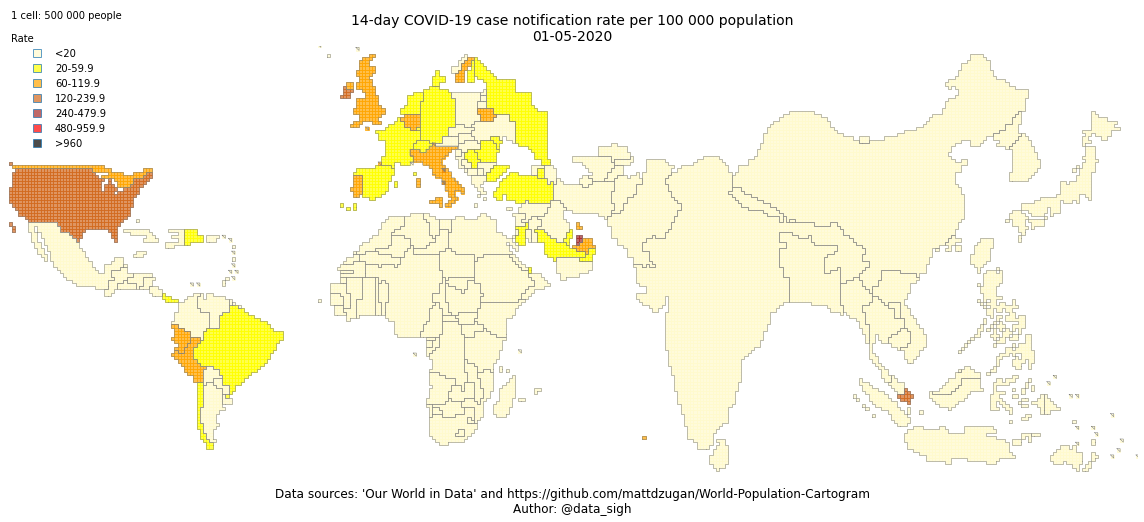

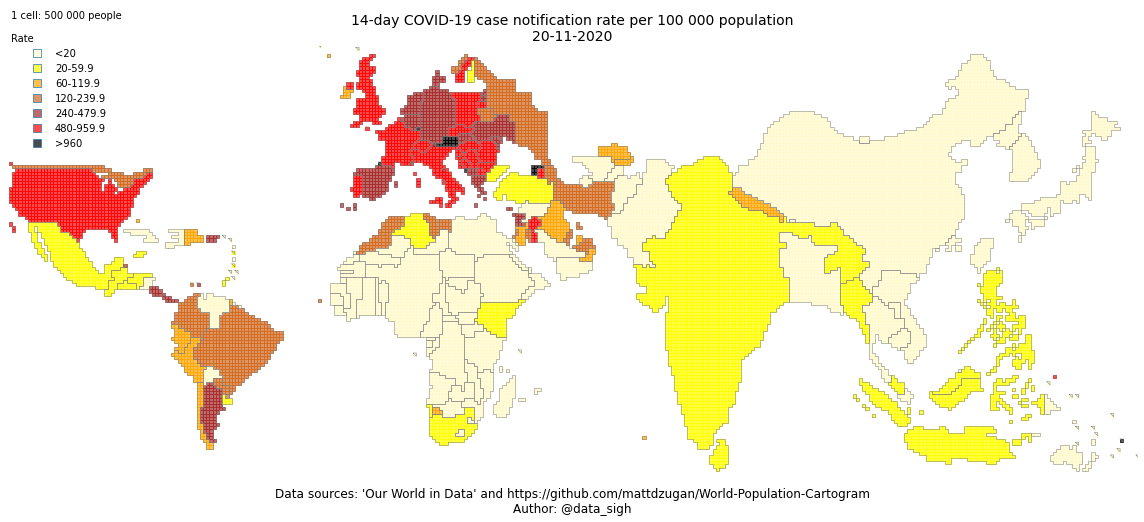

In [17]:
cartogram = True # toggle between cartogram and world map
start_date = '2020-05-01' 

end_date = df_14_day.columns[-4]
cols_lst = [-i-4 for i in range((pd.to_datetime(end_date)-pd.to_datetime(start_date)).days+1)][::-1]

for date in df_14_day.columns[cols_lst]:
  print_date = date[-2:]+date[-6:-3]+'-'+date[:4]
  
  if cartogram:
    cells_day = cells.merge(df_14_day[[date, 'country-code']], left_on='CountryCode', right_on='country-code', how='left')
    cells_day[date].fillna('lemonchiffon', inplace=True)
    
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, aspect='equal')
    plt.xlim([0, max(cells_day.X+1)])
    plt.ylim([0, max(cells_day.Y+1)])

    patches = [(Rectangle((cells_day.loc[i,'X']+.5, cells_day.loc[i,'Y']+.5), 1, 1)) for i in range(cells_day.shape[0])]
    ax.add_collection(PatchCollection(patches, color=cells_day[date], alpha=0.7))

    for p in borders.PolygonID.unique():
      ax.plot(borders.loc[borders.PolygonID==p, 'X']+.5, borders.loc[borders.PolygonID==p, 'Y']+.5, color='grey', lw=.5)
    
    legend_title='1 cell: 500 000 people\n\nRate'
    footer="Data sources: 'Our World in Data' and https://github.com/mattdzugan/World-Population-Cartogram\nAuthor: @data_sigh"
    
  else: # world map
    merged = gdf.merge(df_14_day[[date, 'alpha-3']], left_on='ISO3_CODE', right_on='alpha-3', how='left')
    merged.drop(merged[merged['ISO3_CODE']=='ATA'].index, inplace=True) # drop Antartica
    merged.fillna('lemonchiffon',inplace=True) # fill NaN such as Kashmir with lowest rate

    ax = merged.plot(color=merged[date], figsize=(16,9), legend=True, edgecolor='grey', lw=.3)
    
    legend_title='Rate'
    footer = "Data sources: 'Our World in Data' and © EuroGeographics for the administrative boundaries\nAuthor: @data_sigh"

  plt.legend((sq1, sq2, sq3, sq4, sq5, sq6, sq7), cut_labels, numpoints=1, loc=(.0,.75), title=legend_title, fontsize=10, frameon=False)
  title = '14-day COVID-19 case notification rate per 100 000 population\n' + print_date
  plt.title(title, fontsize=14)
  plt.axis('off')
  plt.figtext(0.5, 0.11, footer, ha='center', fontsize=12)
  plt.tight_layout()
  
  if cartogram:
    plt.savefig(path/'pngs_world'/date, dpi=150)
  else:
    plt.savefig(path/'pngs_world_map'/date, dpi=150)

  if date == start_date or date == end_date:
     plt.show()
  
  plt.close()

## Write the plots to a .gif

In [16]:
if cartogram:
  png_dir = path/'pngs_world'
  gif_name = 'world.gif'
else:
  png_dir = path/'pngs_world_map'
  gif_name = 'world_map.gif'

images = [Image.open(png_dir/img.name) for img in sorted(list(Path.glob(png_dir, pattern='*.png'))) if (img.name>=start_date+'.png') & (img.name<=end_date+'.png')]
images[0].save(fp=gif_name, format='GIF', append_images=images[1:], save_all=True, duration=100, loop=1)
optimize(gif_name) # make the gif file size smaller using pygifsicle

## Thanks to the TrueCue Women in Data Hackathon

Thanks to TrueCue for organising the [hackathon](https://truecue.com/womenindata/hackathon/) and encouraging us all to produce a data analysis. They did a wonderful job managing the hackathon and getting everybody involved. Huge congratulations to the winning teams: Google Gals, MACS and Fishing Consultancy.

All participants got a certificate. I'll show you mine.

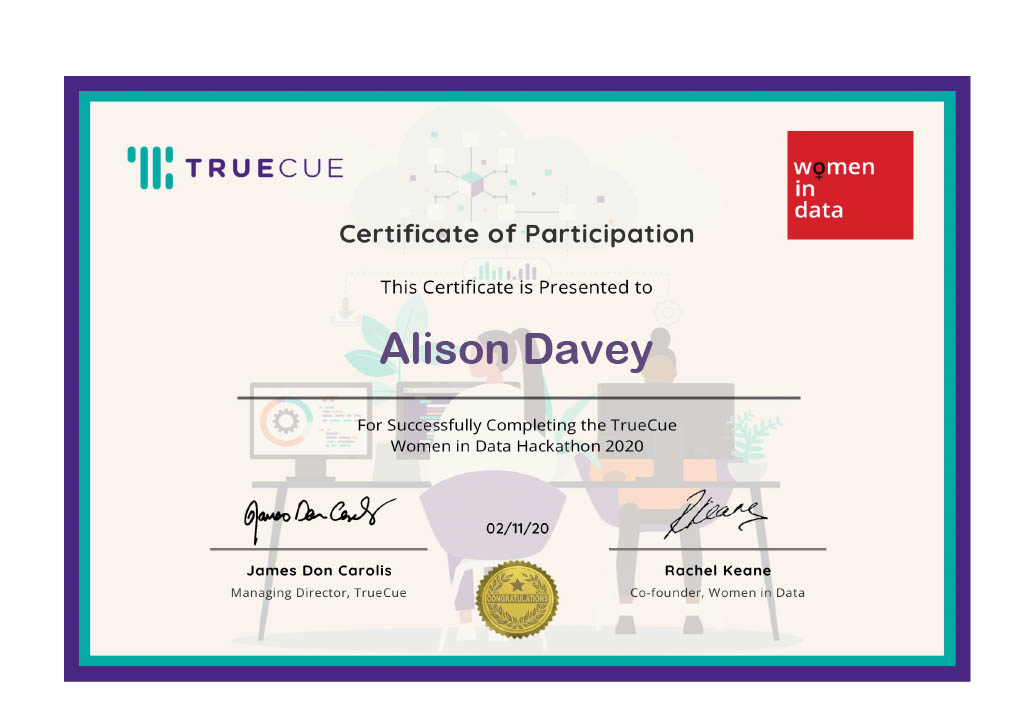

In [12]:
#collapse-hide
Image.open('TrueCue_Women_in_Data_Hackathon_Certificate.jpg')

# Stay safe!

Advice from the World Health Organisation
 - **Avoid the 3Cs**: spaces that are **closed**, **crowded** or involve **close contact**.
Outbreaks have been reported in restaurants, choir practices, fitness classes, nightclubs, offices and places of worship where people have gathered, often in crowded indoor settings where they talk loudly, shout, breathe heavily or sing.
The risks of getting COVID-19 are higher in crowded and inadequately ventilated spaces where infected people spend long periods of time together in close proximity. These environments are where the virus appears to spread by respiratory droplets or aerosols more efficiently, so taking precautions is even more important.
 - **Meet people outside**. Outdoor gatherings are safer than indoor ones, particularly if indoor spaces are small and without outdoor air coming in.
Avoid crowded or indoor settings but if you can’t, then take precautions:
Open a window. Increase the amount of ‘natural ventilation’ when indoors.
 - **Wear a mask**
 